# *Clasificación con Scikit-learn y MLflow*

---

### *1era Parte: Análisis de Datos con Scikit-Learn*

*El Análisis Estadístico Exploratorio (EDA) busca entender la estructura, patrones y comportamiento de los datos antes de aplicar modelos. No se trata solo de observar "números", sino de comprender el contexto y calidad de los datos, anticiparse a posibles problemas (outliers, sesgos, valores faltantes, etc.) y tomar decisiones más informadas durante la limpieza, transformación y modelado.*

1. ***Carga del Conjunto de Datos:*** *Se carga el conjunto de datos de cáncer de mama utilizando la función `load_wine` de Scikit-Learn.* 
    
2. ***Creación de un DataFrame:*** *Se crea un DataFrame utilizando los datos del conjunto de datos, asignando las características a las columnas y la variable objetivo ('target') a una columna adicional.* 
   
3. ***Visualización de los Primeros Registros:***  *Se muestra una vista previa de los primeros registros del DataFrame para obtener una comprensión inicial de los datos.*   
   
4. ***Dimensiones del DataFrame:*** *Se imprime la forma del DataFrame para conocer el número de filas y columnas en los datos.*
   
5. ***Estadísticas Descriptivas:*** *Se proporcionan estadísticas descriptivas del DataFrame, incluyendo conteos, medias, desviaciones estándar, mínimos y máximos.*
   
6. ***Nombres de Columnas:*** *Se muestran los nombres de las columnas presentes en el DataFrame.*




In [3]:
import pandas as pd 
import numpy as np 
import mlflow 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.datasets import load_wine
wine = load_wine()

In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

📌 *¿Se pueden usar los datos sin DataFrame?: Sí, se pueden usar los datos directamente como arrays de NumPy (como hace scikit-learn por defecto).*

***Ventajas de usar pandas.DataFrame:***          
|      Ventaja                      |  Explicación                                                                                 |
| ----------------------------------| -----------------------------------------------------------------------------------------------------------------------------------------|
| *Legibilidad*                 | *Acceder a nombres de columnas, índices y estructuras tabulares similares a una tabla de Excel. Mucho más fácil de leer que un array.*   |
| *Análisis Exploratorio (EDA)* | *Permite usar `.describe()`, `.value_counts()`, `.groupby()`, `.isna()`, etc., para entender tus datos rápidamente.*                      |
| *Integración con bibliotecas* | *Funciona perfectamente con `seaborn`, `matplotlib`, `scikit-learn`, etc. Muchas funciones aceptan directamente `DataFrames`.*           |
| *Carga/guardado de datos*     | *Muy fácil leer y escribir archivos CSV, Excel, JSON, etc., con `read_csv()` y `to_csv()`.*                                              |
| *Limpieza de datos*         | *Es ideal para eliminar nulos, reemplazar valores, convertir tipos de datos, escalar, codificar categorías, etc.*                        |


In [6]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [13]:
df.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [14]:
df.shape    

(178, 13)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [18]:
print(df.isna().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


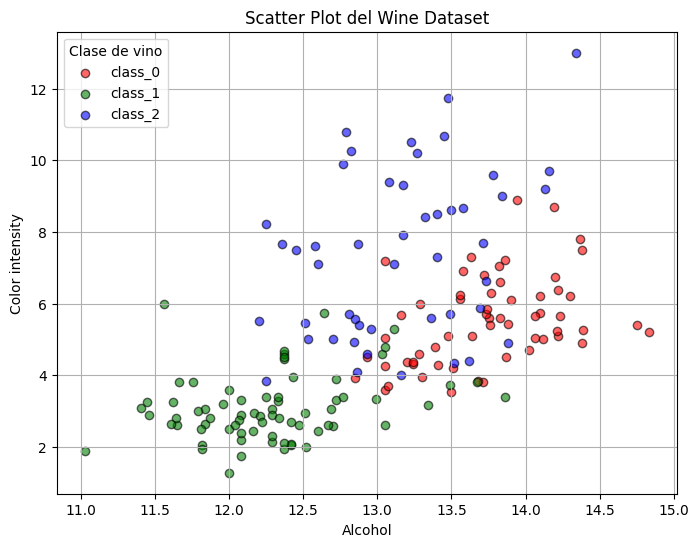

In [10]:
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Crear DataFrame para facilitar la visualización
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Elegimos 2 variables para graficar (por ejemplo alcohol vs color_intensity)
x_var = "alcohol"
y_var = "color_intensity"

# Colores y clases
colors = ['red', 'green', 'blue']
labels = target_names

# Crear scatter plot
plt.figure(figsize=(8,6))
for i, color in enumerate(colors):
    subset = df[df["target"] == i]
    plt.scatter(subset[x_var], subset[y_var], c=color, label=labels[i], alpha=0.6, edgecolors='k')

plt.xlabel(x_var.capitalize())
plt.ylabel(y_var.replace('_', ' ').capitalize())
plt.title("Scatter Plot del Wine Dataset")
plt.legend(title="Clase de vino")
plt.grid(True)
plt.show()


 ### *Informacion que tenemos de Wine*
- 📌 *Tipo problema: Clasificación multiclase*
- 🍷 *Clases: 3 tipos de vino cultivado en Italia ->'target_names': array(['class_0', 'class_1', 'class_2']*
- 🔍 *Features: 13 características químicas (alcohol, color, fenoles, etc.)*
-  🏅*Sin datos faltantes*
-  🧪*Muestras: 178*
  
---

### *2da Parte: Preprocesado, Entrenamiento y Evaluacion:*

*dado un modelo de clasificación multiclase. El objetivo es predecir el tipo de vino (tres clases) a partir de 13 características químicas obtenidas en laboratorio.*

1. ⚙️***Preprocesado***: 
   - *Se estandarizan las variables numéricas mediante StandardScaler, ya que los modelos basados en distancia (como SVM o k-NN) y muchos clasificadores se benefician de datos con media 0 y varianza 1.*
   - *Se divide el conjunto en datos de entrenamiento y prueba utilizando train_test_split.*
  
2. 🧠 ***Entrenamiento***:
   1. *Se entrena un modelo de clasificación (por ejemplo, RandomForestClassifier) utilizando las variables escaladas.*
   2. *El modelo se ajusta con los datos de entrenamiento (fit) y se utiliza para realizar predicciones sobre los datos de prueba (predict).*

3. 📊 ***Evaluación***:
   - *Se calcula un reporte de clasificación con métricas clave: precision, recall, f1-score y support para cada clase.*
   - *Se visualiza la matriz de confusión para entender mejor el desempeño del modelo, evaluando los errores y aciertos en la predicción de cada tipo de vino.*

💡 *Esta sección sienta las bases para la siguiente etapa: el despliegue del modelo, en la que se convertirá el clasificador en una API lista para producción.*

---

In [19]:
# Cargar datos
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('✅Datos entrenamiento: ', X_train.shape)
print('✅Datos test: ', X_test.shape)


✅Datos entrenamiento:  (142, 13)
✅Datos test:  (36, 13)


### *Justificantes:*
* *Cargamos y utilizamos el Dataset en su forma original (como array NumPy) porque:*
* *Más ligero y directo para entrenar modelos con scikit-learn*
* *Perfecto para scripts o pipelines rápidos*
* *No requiere conversión ni overhead adicional*
* *Ideal para la fase de entrenamiento y despliegue*

In [ ]:
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



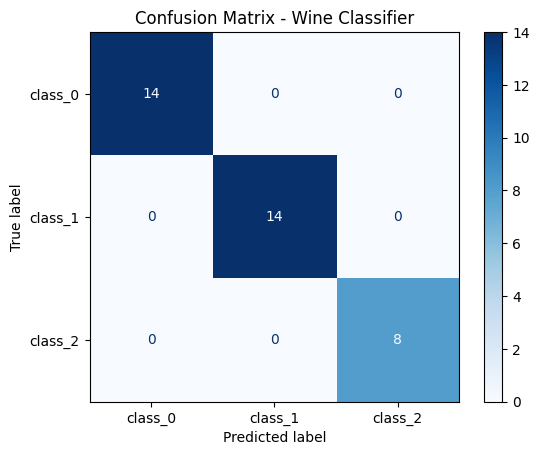

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generar la matriz
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Mostrarla
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Wine Classifier")
plt.show()

In [ ]:
# Guardar modelo
import joblib

joblib.dump(clf, 'wine_model_multiclass.pkl')
joblib.dump(scaler, 'wine_scaler.pkl')

['wine_scaler.pkl']

In [ ]:
# donde estan nuestros archivos?
import os
print("📁 Working directory:", os.getcwd())

📁 Working directory: c:\Users\oridi\Desktop\Programacion\MLOPs\mlops-main


---


### 📦 *Resumen del flujo de trabajo*
1. ***Entrenamiento (main.py)*** 
   - *Carga y escala de los datos*
   - *Entrena un modelo*
   - *Guarda modelo y scaler en .pkl*

2. ***utils.py*** 
   - *Contiene funciones reutilizables (evaluación, etc.)*

3. ***API (main_api.py o main.py en FastAPI)*** 
   - *Cargar los archivos .pkl*
   - *Ofrecer una ruta para recibir nuevos datos y predecir*

4. ***Despliegue (local o nube)*** 
   - *Ejecutar la API y poder usarla desde navegador, web, app, etc.*

---


## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run

In [ ]:
# instalaciones previas desde el shell

pip install fastapi uvicorn transformers
pip install torch

In [ ]:
# Navegamos a nuestro directorio donde tenemos los scripts y podemos desplegar FasTAPI
uvicorn main_hf_api:app --reload


`cd ruta/a/carpeta`